# PcoA visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots

%matplotlib inline

In [6]:
input_dir = "../data/raw"

## Bray-Curtis

In [7]:
pcoa_braycurtis = pd.read_csv(
                 f"{input_dir}/umap_pcoa_export/pcoa_braycurtis/ordination.txt",
                 sep='\t',
                 index_col=0,
                 skiprows= 9,
                 header=None
                 )
pcoa_braycurtis.head()

,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
0,,,,,,,,,,,,,,,,,,,,,
sample_1,0.283033,-0.110512,-0.274010,-0.016259,0.087476,-0.028476,-0.001316,0.176707,0.006420,0.140523,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_10,0.056859,0.336817,0.251573,0.152398,0.090273,0.180916,-0.052728,-0.039445,0.095756,0.012148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_100,-0.259163,-0.164523,-0.079511,0.047163,-0.177951,-0.041796,-0.056316,-0.062273,0.015369,0.073122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_101,-0.258164,-0.158814,-0.107410,0.044260,-0.179465,-0.045061,-0.065795,-0.081906,0.012549,0.077859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_102,0.333272,-0.150844,-0.008202,-0.069469,-0.068753,0.107718,-0.051280,0.080403,0.119660,-0.002919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
metadata = pd.read_csv(
                    f"{input_dir}/metadata.tsv",
                    sep='\t',
                    index_col=0,
                    header=0
                    )

### No filtering

In [6]:
pcoa_braycurtis_metadata_merged = pd.merge(pcoa_braycurtis, metadata, how='left', left_index=True, right_index=True)
pcoa_braycurtis_metadata_merged["infant_id"] = pcoa_braycurtis_metadata_merged["infant_id"].astype("category")

#### Infant clusering

In [27]:
fig = px.scatter_3d(pcoa_braycurtis_metadata_merged,
                    x=1,
                    y=2,
                    z=3,
                    color='infant_id',
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [7]:
fig = px.scatter(pcoa_braycurtis_metadata_merged,
                    x=1,
                    y=2,
                    color='infant_id',
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#### Timepoint clusering

In [28]:
fig = px.scatter_3d(pcoa_braycurtis_metadata_merged,
                    x=1,
                    y=2,
                    z=3,
                    color='timepoint',
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#### Infant + Timepoint clustering

In [29]:
fig = px.scatter_3d(pcoa_braycurtis_metadata_merged,
                    x=1,
                    y=2,
                    z=3,
                    color='infant_id',
                    symbol='timepoint',
                    symbol_map={
                    "2 months": "circle",
                    "4 months": "cross",
                    "6 months": "diamond"},
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### Infants that have samples at 2, 4 and 6 months

In [6]:
infants_246 = metadata.groupby("infant_id")["timepoint"].nunique().eq(3)
infants_246_index = infants_246[infants_246].index
metadata_246 = metadata[metadata["infant_id"].isin(infants_246_index)]

In [7]:
pcoa_braycurtis_metadata_246_merged = pd.merge(pcoa_braycurtis.iloc[:,0:3], metadata_246, how='inner', left_index=True, right_index=True)
pcoa_braycurtis_metadata_246_merged["infant_id"] = pcoa_braycurtis_metadata_246_merged["infant_id"].astype("category")
pcoa_braycurtis_metadata_246_merged

,1,2,3,infant_id,timepoint,sample_number,age_days,sex,feeding_method,birth_mode,collection_date,collection_site,behavioral_development,parent_attuned_caring_style,sleep_rhythmicity,sleep_quality
sample_10,0.056859,0.336817,0.251573,3,2 months,3,80,Male,primarily breast-fed at enrolment,vaginal birth,2023,pediatrician x,190.0,3.769231,0.570000,0.388889
sample_100,-0.259163,-0.164523,-0.079511,5,6 months,2,200,Female,primarily breast-fed at enrolment,vaginal birth,2023,pediatrician x,285.0,3.230769,0.583333,0.800439
sample_101,-0.258164,-0.158814,-0.107410,5,6 months,3,201,Female,primarily breast-fed at enrolment,vaginal birth,2023,pediatrician x,285.0,3.230769,0.583333,0.800439
sample_102,0.333272,-0.150844,-0.008202,7,6 months,1,189,Male,primarily breast-fed at enrolment,vaginal birth,2024,pediatrician x,NaN,NaN,NaN,NaN
sample_103,0.372270,-0.065612,-0.236877,7,6 months,2,190,Male,primarily breast-fed at enrolment,vaginal birth,2024,pediatrician x,NaN,NaN,NaN,NaN
sample_104,0.354823,-0.057895,-0.215265,7,6 months,3,190,Male,primarily breast-fed at enrolment,vaginal birth,2024,pediatrician x,NaN,NaN,NaN,NaN
sample_106,0.383625,-0.140290,0.050810,10,6 months,1,185,Female,primarily breast-fed at enrolment,vaginal birth,2024,pediatrician x,255.0,3.846154,NaN,0.541484
sample_11,0.097905,0.300372,0.243987,3,2 months,4,81,Male,primarily breast-fed at enrolment,vaginal birth,2023,pediatrician x,190.0,3.769231,0.570000,0.388889
sample_12,-0.341982,-0.051515,-0.186025,4,2 months,1,78,Female,primarily breast-fed at enrolment,vaginal birth,2023,pediatrician x,300.0,3.307692,0.508333,0.530702
sample_13,-0.338771,-0.025168,-0.143087,4,2 months,2,79,Female,primarily breast-fed at enrolment,vaginal birth,2023,pediatrician x,300.0,3.307692,0.508333,0.530702


#### Infant clustering

In [64]:
fig = px.scatter_3d(pcoa_braycurtis_metadata_246_merged,
                    x=1,
                    y=2,
                    z=3,
                    color='infant_id',
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

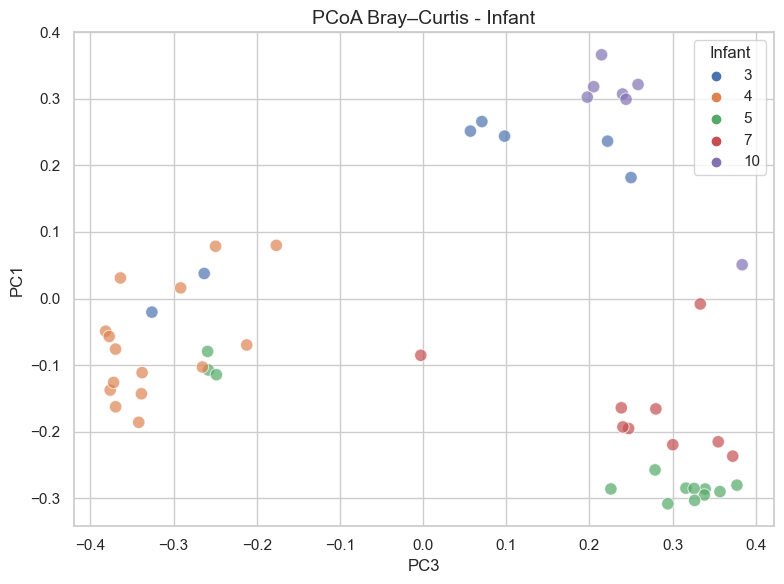

In [24]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(8, 6))

ax = sns.scatterplot(
    data=pcoa_braycurtis_metadata_246_merged,
    x=1,
    y=3,
    hue="infant_id",
    s=80,
    alpha=0.7
)
ax.legend(title="Infant")

plt.xlabel("PC3")
plt.ylabel("PC1")
plt.title("PCoA Bray–Curtis - Infant", fontsize = 14)

plt.tight_layout()
plt.show()
fig.savefig("/Users/yararoth/Desktop/infant_cluserting.pdf")

#### Timepoint clustering

In [65]:
fig = px.scatter_3d(pcoa_braycurtis_metadata_246_merged,
                    x=1,
                    y=2,
                    z=3,
                    color='timepoint',
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

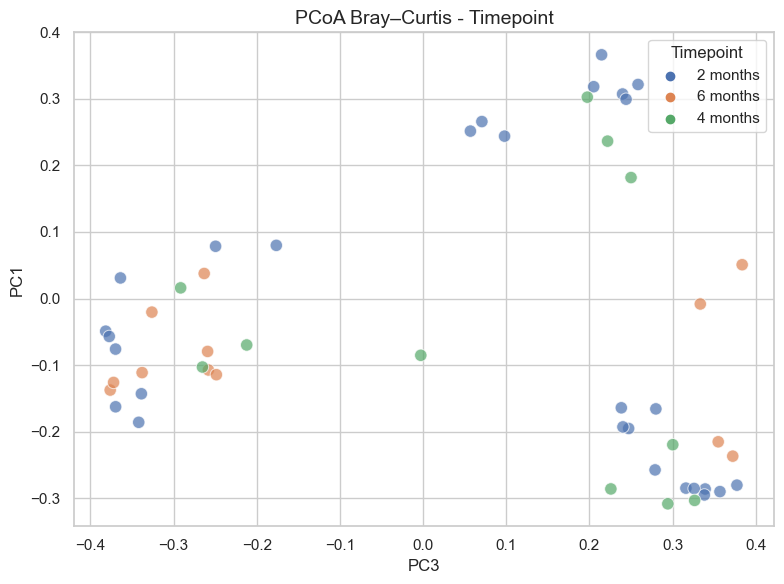

In [23]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(8, 6))

ax = sns.scatterplot(
    data=pcoa_braycurtis_metadata_246_merged,
    x=1,
    y=3,
    hue="timepoint",
    s=80,
    alpha=0.7
)

ax.legend(title="Timepoint")
plt.xlabel("PC3")
plt.ylabel("PC1")
plt.title("PCoA Bray–Curtis - Timepoint", fontsize = 14)

plt.tight_layout()
plt.show()
fig.savefig("/Users/yararoth/Desktop/timepoint_cluserting.pdf")

#### Infant + timepoint clustering

In [40]:
fig = px.scatter_3d(pcoa_braycurtis_metadata_246_merged,
                    x=1,
                    y=2,
                    z=3,
                    color='infant_id',
                    symbol='timepoint',
                    symbol_map={
                    "2 months": "circle",
                    "4 months": "cross",
                    "6 months": "diamond"},
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

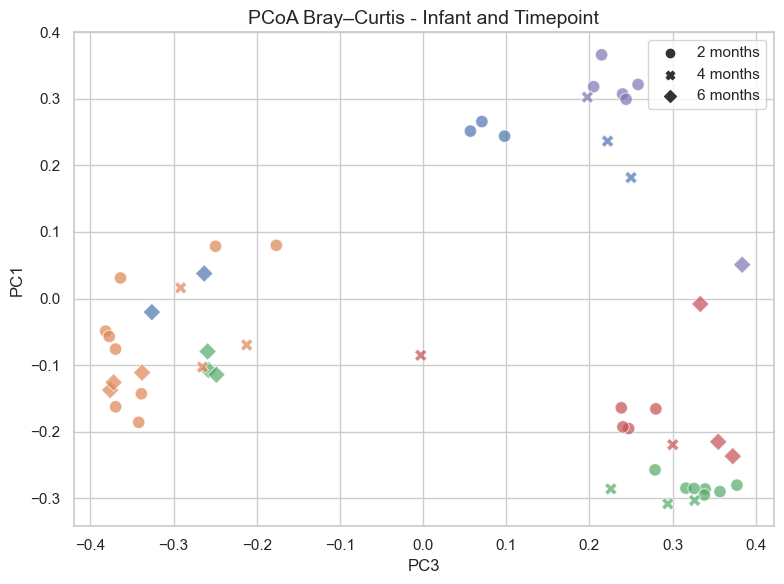

In [27]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(8, 6))

markers = {
    "2 months": "o",
    "4 months": "X",
    "6 months": "D"
}

ax = sns.scatterplot(
    data=pcoa_braycurtis_metadata_246_merged,
    x=1,
    y=3,
    hue="infant_id",
    style="timepoint",
    markers=markers,
    s=80,
    alpha=0.7
)

plt.xlabel("PC3")
plt.ylabel("PC1")
plt.title("PCoA Bray–Curtis - Infant and Timepoint", fontsize=14)

# Legend
desired_order = ["2 months", "4 months", "6 months"]
handles, labels = ax.get_legend_handles_labels()
new_handles = [handles[labels.index(lbl)] for lbl in desired_order]
new_labels  = desired_order
ax.legend(new_handles, new_labels)

plt.tight_layout()
plt.show()
fig.savefig("/Users/yararoth/Desktop/infant_timepoint_cluserting.pdf")

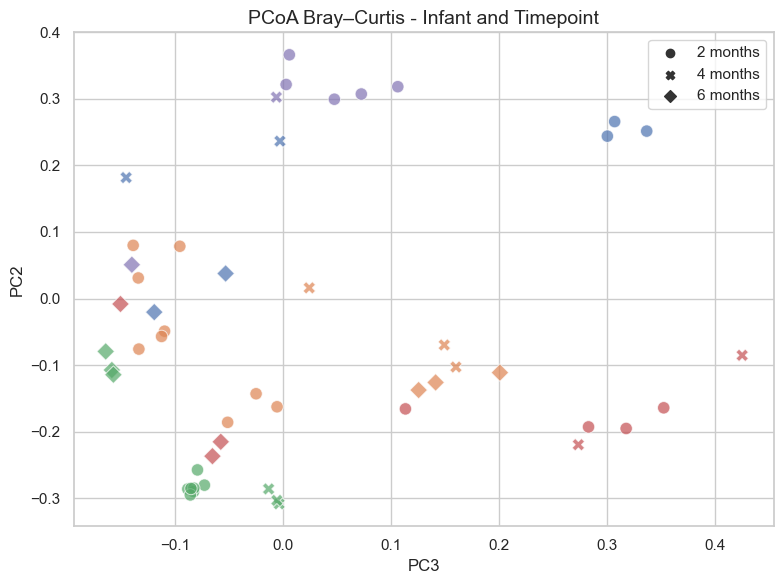

In [26]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(8, 6))

markers = {
    "2 months": "o",
    "4 months": "X",
    "6 months": "D"
}

ax = sns.scatterplot(
    data=pcoa_braycurtis_metadata_246_merged,
    x=2,
    y=3,
    hue="infant_id",
    style="timepoint",
    markers=markers,
    s=80,
    alpha=0.7
)

plt.xlabel("PC3")
plt.ylabel("PC2")
plt.title("PCoA Bray–Curtis - Infant and Timepoint", fontsize = 14)

# Legend
desired_order = ["2 months", "4 months", "6 months"]
handles, labels = ax.get_legend_handles_labels()
new_handles = [handles[labels.index(lbl)] for lbl in desired_order]
new_labels  = desired_order
ax.legend(new_handles, new_labels)

plt.tight_layout()
plt.show()
fig.savefig("/Users/yararoth/Desktop/infant_timepoint_cluserting_2.pdf")

### All infants, max 3 samples per timepoint 

In [ ]:
metadata.groupby(["infant_id", "timepoint"]).size().unstack()
metadata_samples3 = metadata.groupby(["infant_id", "timepoint"]).head(3)
metadata_samples3.groupby(["infant_id", "timepoint"]).size().unstack()

Index(['sample_1', 'sample_2', 'sample_3', 'sample_6', 'sample_7', 'sample_8',
       'sample_9', 'sample_10', 'sample_12', 'sample_13', 'sample_14',
       'sample_22', 'sample_23', 'sample_24', 'sample_29', 'sample_30',
       'sample_31', 'sample_32', 'sample_33', 'sample_35', 'sample_36',
       'sample_37', 'sample_38', 'sample_39', 'sample_40', 'sample_41',
       'sample_42', 'sample_43', 'sample_46', 'sample_47', 'sample_48',
       'sample_49', 'sample_50', 'sample_52', 'sample_53', 'sample_54',
       'sample_55', 'sample_56', 'sample_57', 'sample_58', 'sample_59',
       'sample_63', 'sample_64', 'sample_65', 'sample_66', 'sample_67',
       'sample_68', 'sample_69', 'sample_70', 'sample_71', 'sample_80',
       'sample_81', 'sample_82', 'sample_83', 'sample_84', 'sample_87',
       'sample_88', 'sample_89', 'sample_90', 'sample_91', 'sample_92',
       'sample_94', 'sample_95', 'sample_96', 'sample_97', 'sample_98',
       'sample_99', 'sample_100', 'sample_101', 'sample_10

In [63]:
pcoa_braycurtis_metadata_samples3_merged = pd.merge(pcoa_braycurtis, metadata_samples3, how='inner', left_index=True, right_index=True)
pcoa_braycurtis_metadata_samples3_merged["infant_id"] = pcoa_braycurtis_metadata_samples3_merged["infant_id"].astype("category")

#### Infant clustering

In [64]:
fig = px.scatter_3d(pcoa_braycurtis_metadata_samples3_merged,
                    x=1,
                    y=2,
                    z=3,
                    color='infant_id',
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#### Timepoint clustering

In [38]:
fig = px.scatter_3d(pcoa_braycurtis_metadata_samples3_merged,
                    x=1,
                    y=2,
                    z=3,
                    color='timepoint',
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#### Timepoint and infant

In [48]:
fig = px.scatter_3d(pcoa_braycurtis_metadata_samples3_merged,
                    x=1,
                    y=2,
                    z=3,
                    color='infant_id',
                    symbol='timepoint',
                    symbol_map={
                    "2 months": "circle",
                    "4 months": "cross",
                    "6 months": "diamond"},
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Jaccard

In [11]:
pcoa_jaccard = pd.read_csv(
                 f"{input_dir}/umap_pcoa_export/pcoa_jaccard/ordination.txt",
                 sep='\t',
                 index_col=0,
                 skiprows= 9,
                 header=None
                 )
pcoa_jaccard.head()

,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
0,,,,,,,,,,,,,,,,,,,,,
sample_1,-0.029038,0.101255,0.095090,0.193738,0.148201,0.106565,0.040371,-0.045196,-0.147714,-0.029989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_10,-0.141454,0.076152,0.246444,-0.098065,-0.029360,-0.044824,-0.085840,0.104507,0.021555,0.005369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_100,0.086838,0.138318,-0.110114,0.122877,-0.070818,-0.139107,0.211704,0.054561,0.134884,-0.041278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_101,0.093675,0.246572,-0.003616,0.123374,-0.111619,-0.088396,0.190335,-0.037205,0.159301,0.056039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_102,-0.084261,0.050761,0.052681,0.187739,0.190556,-0.049896,-0.045054,-0.006833,0.049824,-0.013177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
metadata = pd.read_csv(
                    f"{input_dir}/metadata.tsv",
                    sep='\t',
                    index_col=0,
                    header=0
                    )

### No filtering

In [12]:
pcoa_jaccard_metadata_merged = pd.merge(pcoa_jaccard, metadata, how='left', left_index=True, right_index=True)
pcoa_jaccard_metadata_merged["infant_id"] = pcoa_jaccard_metadata_merged["infant_id"].astype("category")

#### Infant Clustering

In [13]:
fig = px.scatter_3d(pcoa_jaccard_metadata_merged,
                    x=1,
                    y=2,
                    z=3,
                    color='infant_id',
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#### Timepoint

In [14]:
fig = px.scatter_3d(pcoa_jaccard_metadata_merged,
                    x=1,
                    y=2,
                    z=3,
                    color='timepoint',
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#### Timepoint and Infant

In [16]:
fig = px.scatter_3d(pcoa_jaccard_metadata_merged,
                    x=1,
                    y=2,
                    z=3,
                    color='infant_id',
                    symbol='timepoint',
                    symbol_map={
                    "2 months": "circle",
                    "4 months": "cross",
                    "6 months": "diamond"},
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()